## Introduction

### Aim of the Model
- The aim of the model (kNN) is to be able to succesfully identify patients that show signs of suffering a heart attack.

### Approach
- In order to apprach this problem I'll run two versions of the kNN model:
- Version 1: Test multiple hyperparamters and select the optimal one manually (based on a performance visualization)
- Version 2: Test multiple hyperparameters with GridSearchCV (2-fold) and select the optimal one.
    *My reasoning for only performing 2-fold CV is to avoid overfitting the model, given the small size of the dataset*

### Definitions of the Variables

- **Age** *(age)* is the age of candidate
- **Sex** *(sex)* has numeric values. 1 denotes male and 0 denotes female
- **Chest Pain** *(cp)* pain has values between 0-3. The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack
- **Resting Blood Pressure** *(trtbps)* is normal pressure with no exercise
- **Cholesterol** *(chol)* means the blockage for blood supply in the blood vessels
- **Fasting Blood Pressure** *(fbs)* is blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning
- **Rest ECG** *(restecg)* results means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening
- **Maximum Heart Rate** *(thalachh)* achieved
- **Exercise Induced Angina** *(exng)* is chest pain while exercising or doing any physical activity
- **ST Depression** *(oldpeak)* is the difference between value of ECG at rest and after exercise
- **ST Slope** *(slp)* is the tangent to the depression value 
- **Number of Major Blood Vessels** *(caa)* supplying blood to heart blocked
- **Types of Thalassemia** *(thall)*
- **Heart Attack** *(target)* where 1 denotes Heart Attack suffered and 0 where it did not take place

## Package & Data Imports

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing Dataset
data = pd.read_csv('./heart.csv')
print(data.shape)
data.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA

### Observations
***Population Distribution***
- *Gender (sex):* Population presents ~x2 times more Males (1) than Females (0)
- *Age (age):* Despite Male population presenting a slighly younger mean distibutions are similar, both presenting more observation below the mean (skewed to the left)

***Gender Comparisons***
- *Types of Thalassemia (thall):* Females have significant bigger probability of suffering type 2 Thalassemia. whilst males present a bigger probability of suffering type 3 Thalassemia
- *Heart Attack (target):* Females have higher probability than males to suffer a heart attack
- *Other Variables:* For all other variables there are differences in scales, but probability distribitions are very similar

***Correlations***
- We can observe from the heatmap that there are no major correlations

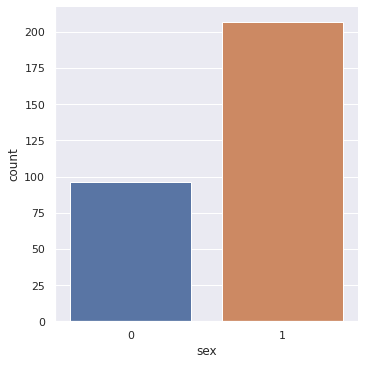

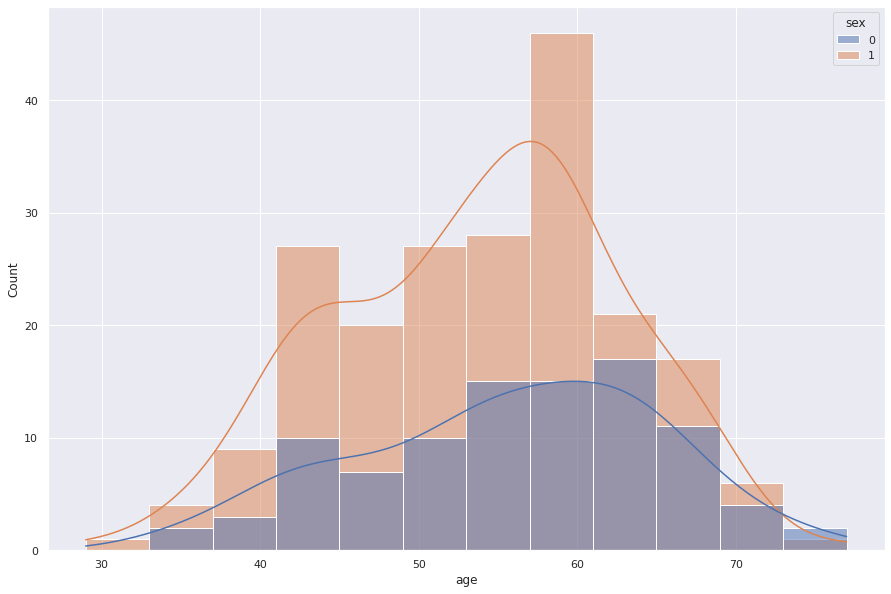

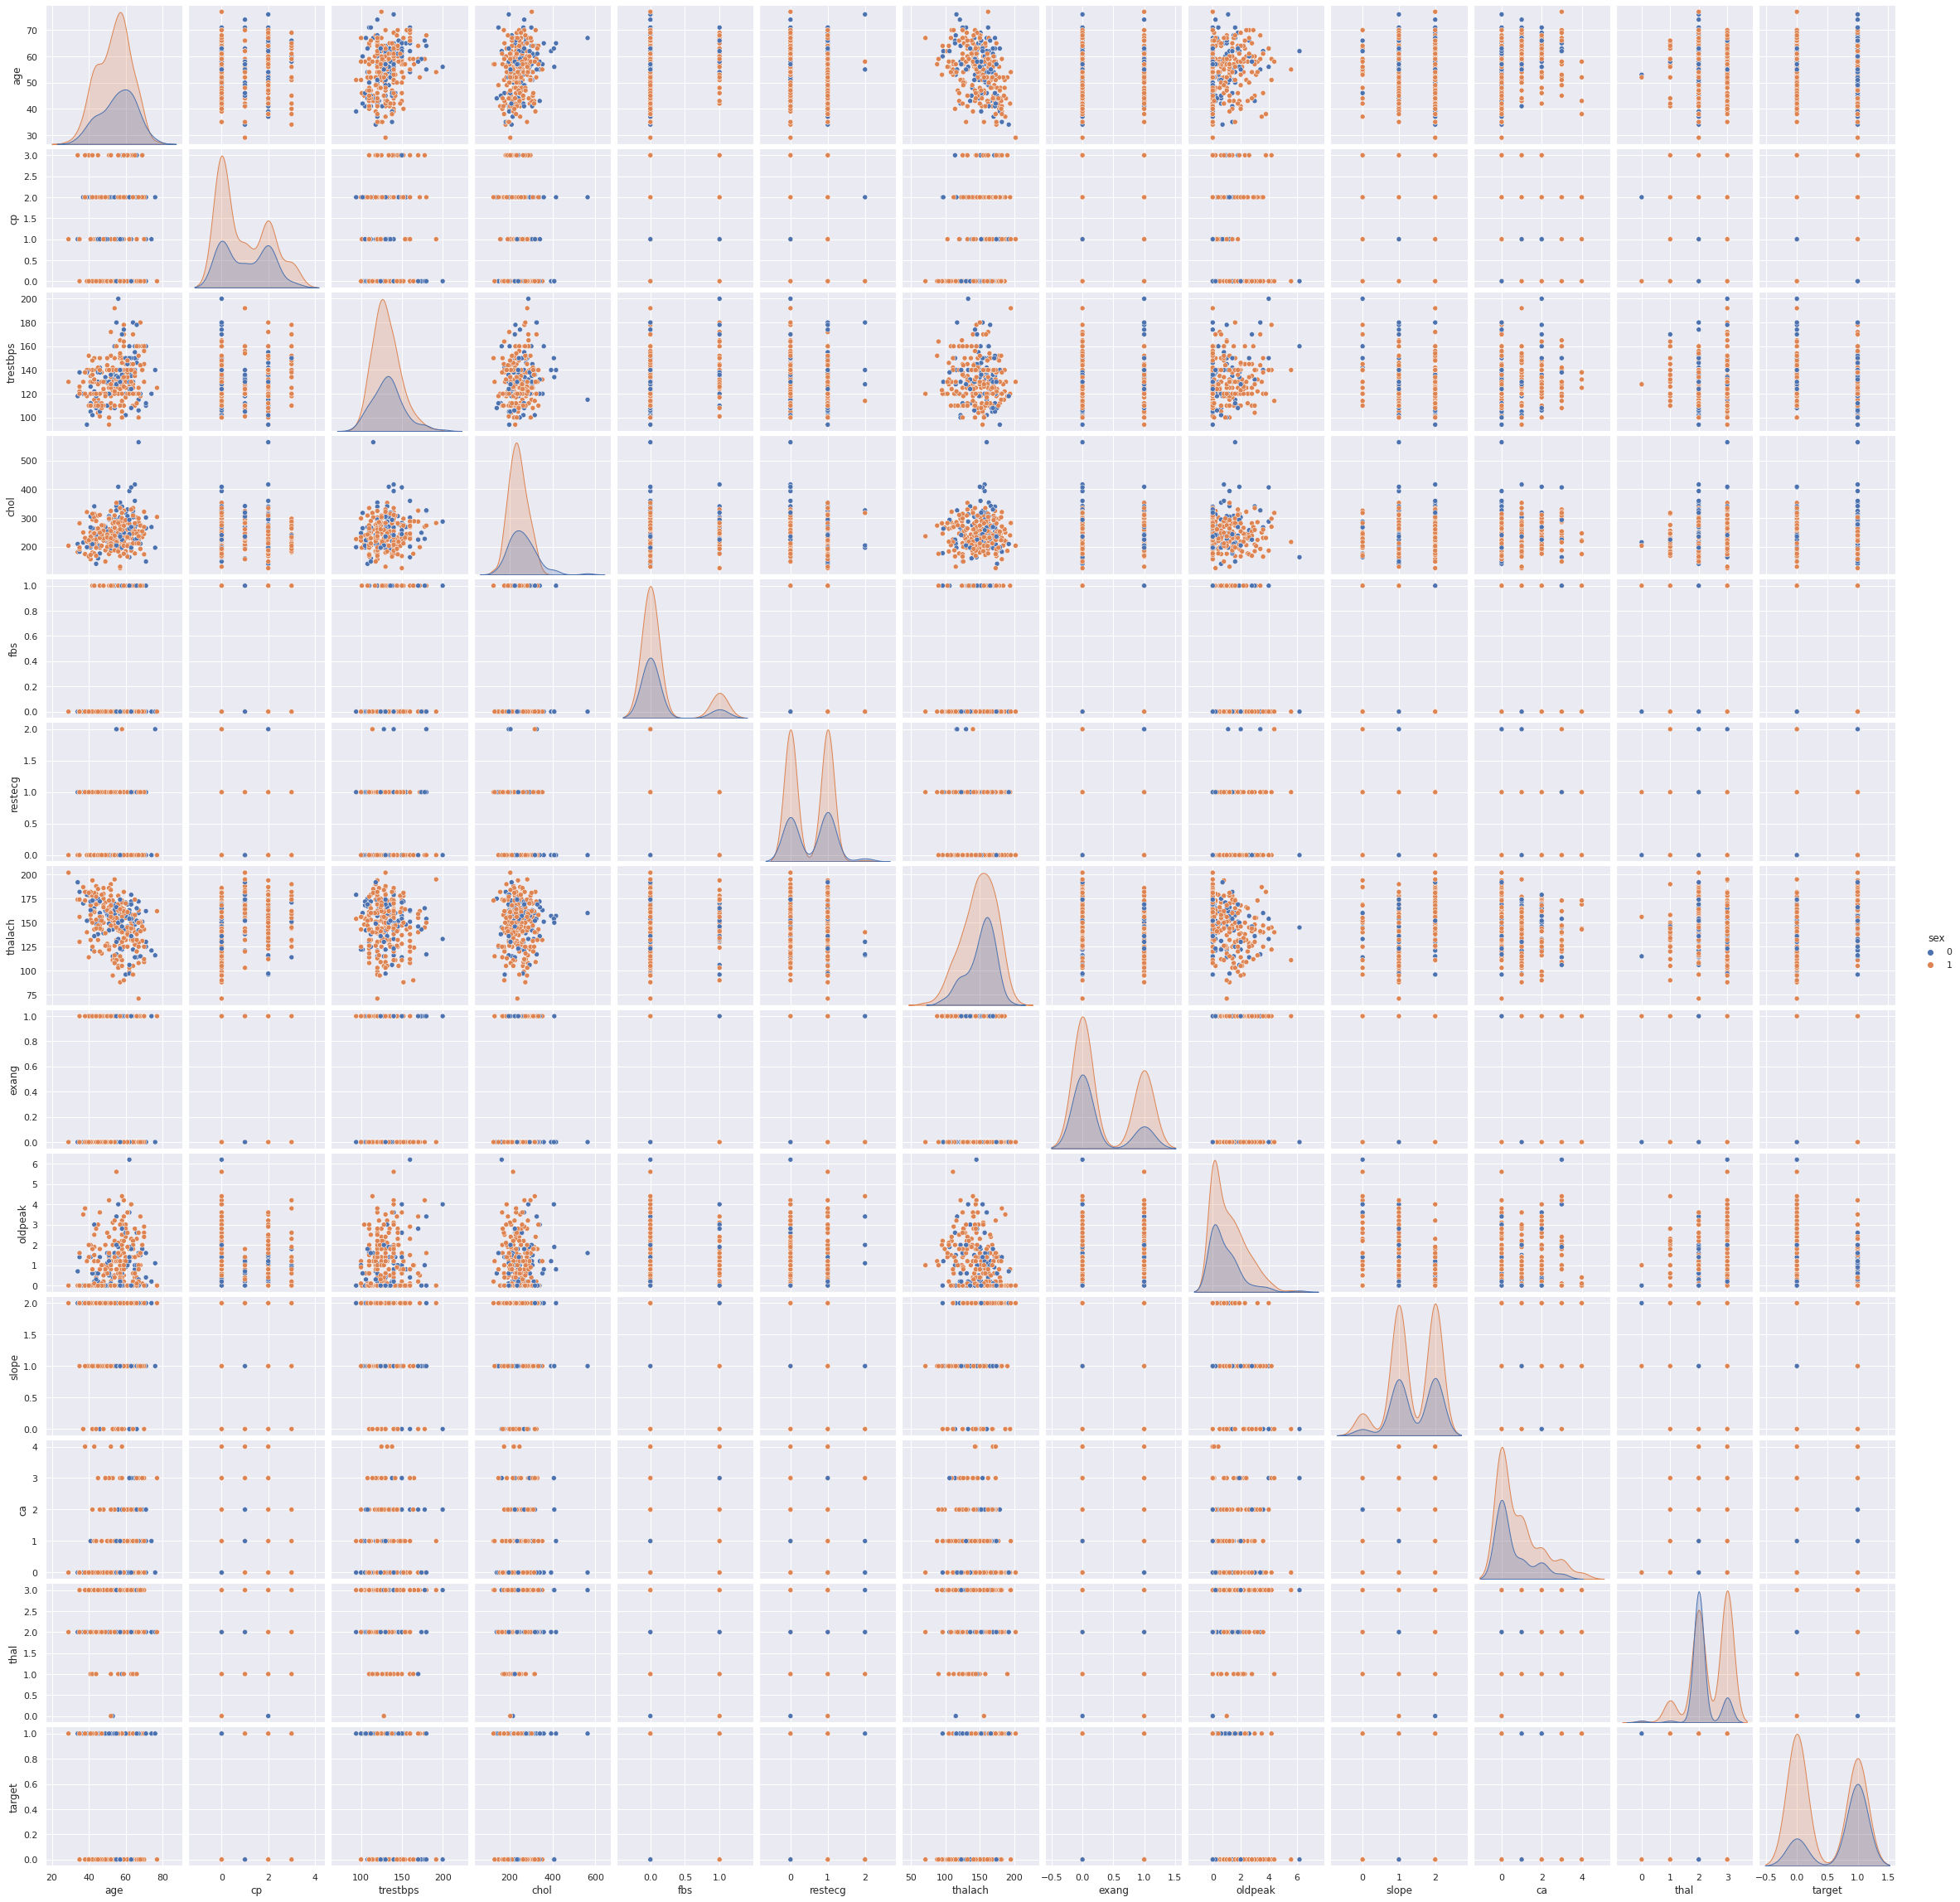

In [ ]:
graph_df = data.copy()
sns.set()
sns.set(rc={'figure.figsize':(15,10)})

# Population
sns.catplot(x='sex', kind='count', data=graph_df)
plt.show()
plt.close()

# Age
sns.histplot(x='age', hue='sex', kde=True, data=graph_df)
plt.show()
plt.close()

# Pairplot
sns.pairplot(graph_df, hue='sex')
plt.show()
plt.close()

# Plotting Correlations
# sns.heatmap(graph_df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
# plt.show()
# plt.close()

del graph_df

## Preprocessing

#### Observations
- There is no missing data. This means preprocessing will be limited to scaling the data (no imputing or any other process for handling missing data)

#### Model/Hold-Out and Training/Test Splits
- Step 1: Arrange all features and labels as numpy arrays
- Step 2: Create *Model* and *Hold-Out* sets. Having a *Hold-Out* set (data never seen by the model) will ensure the best test on model performance on unseen data
- Step 3: Create *Training* and *Test* sets for model creation

In [ ]:
# Check for Missing Data
print(data.info())
# Centering and Scaling Model Features
    # Separating Features and Labels
data_features = data.drop('target', axis=1)
data_labels = data.target
    # Scaling Features
data_features_scaled = scale(data_features)

# Features/Label in numpy arrays
features = data_features_scaled
label = data_labels.to_numpy()
# Model/Hold-out sets
model_features, holdout_features, model_label, holdout_label = \
    train_test_split(features, label, test_size=0.2, random_state=57, stratify=label)
# Test/Train sets from Model set
train_features, test_features, train_label, test_label = \
    train_test_split(model_features, model_label, test_size=0.2, random_state=14, stratify=model_label)

## kNN Model Version 1

***Model Creation***
- Step 1: Open the necessary numpy arrays
- Step 2: Iterate over the hyparparameter candidates and visualize performance
- Steo 3: Run the model with the optimal hyperparameter

In [ ]:
# NumPy Arrays
neighbors = np.arange(1, 25, step=1)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Iterating Hyperparamater Candidates and Recording Performance
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, train_label)
    train_accuracy[i] = knn.score(train_features, train_label)
    test_accuracy[i] = knn.score(test_features, test_label)
# Visualize Performance of Hyperparamaters
plt.title('k,NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', color='red', marker='o')
plt.plot(neighbors, train_accuracy, label='Training Accuracy', linestyle='--', color='grey')
plt.xticks(neighbors)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
plt.close()

In [ ]:
# Fitting and Scoring the model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(model_features, model_label)
knn_model_score = knn.score(model_features, model_label)
knn_holdout_score = knn.score(holdout_features, holdout_label)
knn_holdout_predict = knn.predict(holdout_features)
print('INITIAL MODEL PERFORMANCE')
print('kNN Score on Training Data: {}%'.format((knn_model_score*100).round(2)))
print('kNN Score on Hold-Out Data: {}%'.format((knn_holdout_score*100).round(2)))
print('kNN Classification Report:')
print(classification_report(holdout_label, knn_holdout_predict))
print('')

## kNN Model Version 2

***Model Creation***
- Step 1: Open 2-fold GridSearchCv
- Step 2: Automate kNN with optimal hyperparamters from step 1
- Steo 3: Run the model with the optimal hyperparameter

In [ ]:
# Tuning for optimal hyperparameter 'k' (number of neighbors) with GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 100, step=1)}
knn = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(knn, param_grid, cv=2)
knn_grid_cv.fit(model_features, model_label)
optimal_k = knn_grid_cv.best_params_['n_neighbors']
optimal_score = knn_grid_cv.best_score_
# Testing the model on unseen data
knn_tuned = KNeighborsClassifier(n_neighbors=optimal_k)
knn_tuned.fit(model_features, model_label)
accuracy = knn_tuned.score(holdout_features, holdout_label)
knn_tuned_predict = knn_tuned.predict(holdout_features)
print('TUNING PERFORMANCE')
print('Optimal Value of Hyperparameter: {}'.format(optimal_k))
print('kNN Score on Training Data: {}%'.format((optimal_score * 100).round(2)))
print('kNN Score on Hold-Out Data: {}%'.format((accuracy * 100).round(2)))
print('kNN Classifciation Report:')
print(classification_report(holdout_label, knn_tuned_predict))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd775439-f3d2-4e6d-9916-a56701a1b233' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>